In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('359383403_T_ONTIMEL.csv')

In [3]:
#The first step we take is to "peek" at the data. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469968 entries, 0 to 469967
Data columns (total 9 columns):
MONTH                469968 non-null int64
UNIQUE_CARRIER       469968 non-null object
AIRLINE_ID           469968 non-null int64
CARRIER              469968 non-null object
ORIGIN_AIRPORT_ID    469968 non-null int64
ORIGIN_CITY_NAME     469968 non-null object
DEP_DELAY            458311 non-null float64
DEP_DELAY_NEW        458311 non-null float64
Unnamed: 8           0 non-null float64
dtypes: float64(3), int64(3), object(3)
memory usage: 32.3+ MB


In [4]:
#Peek at the first 10 rows of the data.
df.head(10)

,MONTH,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,DEP_DELAY,DEP_DELAY_NEW,Unnamed: 8
0,1,AA,19805,AA,12478,"New York, NY",-5.0,0.0,NaN
1,1,AA,19805,AA,12478,"New York, NY",-10.0,0.0,NaN
2,1,AA,19805,AA,12478,"New York, NY",-7.0,0.0,NaN
3,1,AA,19805,AA,12478,"New York, NY",-7.0,0.0,NaN
4,1,AA,19805,AA,12478,"New York, NY",-7.0,0.0,NaN
5,1,AA,19805,AA,12478,"New York, NY",-4.0,0.0,NaN
6,1,AA,19805,AA,12478,"New York, NY",-1.0,0.0,NaN
7,1,AA,19805,AA,12478,"New York, NY",-4.0,0.0,NaN
8,1,AA,19805,AA,12478,"New York, NY",1.0,1.0,NaN
9,1,AA,19805,AA,12478,"New York, NY",3.0,3.0,NaN


In [5]:
#Dropped redundant column [Unnamed: 8]
df.drop('Unnamed: 8', axis=1, inplace=True) 
df.head()

,MONTH,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,DEP_DELAY,DEP_DELAY_NEW
0,1,AA,19805,AA,12478,"New York, NY",-5.0,0.0
1,1,AA,19805,AA,12478,"New York, NY",-10.0,0.0
2,1,AA,19805,AA,12478,"New York, NY",-7.0,0.0
3,1,AA,19805,AA,12478,"New York, NY",-7.0,0.0
4,1,AA,19805,AA,12478,"New York, NY",-7.0,0.0


In [6]:
#Checking to see how many different airline carriers are there.
df['CARRIER'].unique()

array(['AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'HA', 'MQ', 'NK', 'OO', 'UA',
       'US', 'VX', 'WN'], dtype=object)

In [7]:
#Checking to see how many different airline carriers are there.
df['UNIQUE_CARRIER'].unique()

array(['AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'HA', 'MQ', 'NK', 'OO', 'UA',
       'US', 'VX', 'WN'], dtype=object)

As we can see, both the data 'UNIQUE_CARRIER' and 'CARRIER' are similiar.

In [8]:
#I decided to drop 'CARRIER' as it's redundant.
df.drop('CARRIER', axis=1, inplace=True)

In [9]:
#Let's see what kind of cities are there.
df['ORIGIN_CITY_NAME'].unique()

array(['New York, NY', 'Los Angeles, CA', 'Dallas/Fort Worth, TX',
       'Kahului, HI', 'Honolulu, HI', 'San Francisco, CA', 'Atlanta, GA',
       'Boston, MA', 'Ontario, CA', 'Washington, DC', 'Las Vegas, NV',
       'Phoenix, AZ', 'Jacksonville, FL', 'Miami, FL', 'Tampa, FL',
       'Philadelphia, PA', 'San Juan, PR', 'Hayden, CO', 'San Diego, CA',
       'Chicago, IL', 'Seattle, WA', 'Detroit, MI', 'San Jose, CA',
       'Salt Lake City, UT', 'Kona, HI', 'Orlando, FL', 'Denver, CO',
       'St. Louis, MO', 'Jackson, WY', 'Cleveland, OH', 'Houston, TX',
       'Tucson, AZ', 'Portland, OR', 'New Orleans, LA', 'Santa Ana, CA',
       'Hartford, CT', 'Fort Myers, FL', 'San Antonio, TX',
       'Milwaukee, WI', 'West Palm Beach/Palm Beach, FL', 'Charlotte, NC',
       'Baltimore, MD', 'Nashville, TN', 'Mission/McAllen/Edinburg, TX',
       'Newark, NJ', 'Austin, TX', 'Raleigh/Durham, NC', 'Lihue, HI',
       'Kansas City, MO', 'Norfolk, VA', 'Colorado Springs, CO',
       'Charlotte Ama

In [10]:
#How many aiports,cities are there?
len(df['ORIGIN_CITY_NAME'].unique())

308

From the result above, we have 308 different unique airports. Do note that some cities have more than 1 airport.

In [11]:
#Apply the constraints of 75-89 minutes to filter out unncessary data 
#At this point, I wasn't sure if there are any discrepancies between DEP_DELAY & DEP_DELAY_NEW. So, I decided to 
#keep both of these columns.
filtered=df[(df.DEP_DELAY_NEW>=75) & (df.DEP_DELAY_NEW<=89) & (df.DEP_DELAY>=75) & (df.DEP_DELAY<=89)]
filtered.head()

,MONTH,UNIQUE_CARRIER,AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME,DEP_DELAY,DEP_DELAY_NEW
99,1,AA,19805,12892,"Los Angeles, CA",82.0,82.0
128,1,AA,19805,11298,"Dallas/Fort Worth, TX",89.0,89.0
191,1,AA,19805,11298,"Dallas/Fort Worth, TX",84.0,84.0
373,1,AA,19805,12478,"New York, NY",82.0,82.0
442,1,AA,19805,10397,"Atlanta, GA",89.0,89.0


In [12]:
#Checking if there are any null values in our filtered data.
filtered.isnull().values.any()

False

In [13]:
#After adding the delay constraint (75-89minunutes),we now have 245 unique airports as compared to 308 airports
#from before.
len(filtered.groupby(['ORIGIN_CITY_NAME']))

245

NICE! There is no null values with the 75-89minutes timeframe.

In [14]:
#Let's see how many delays we have in total amongst all the 245 airports in cities.
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4990 entries, 99 to 469945
Data columns (total 7 columns):
MONTH                4990 non-null int64
UNIQUE_CARRIER       4990 non-null object
AIRLINE_ID           4990 non-null int64
ORIGIN_AIRPORT_ID    4990 non-null int64
ORIGIN_CITY_NAME     4990 non-null object
DEP_DELAY            4990 non-null float64
DEP_DELAY_NEW        4990 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 311.9+ KB


In [15]:
#Visualizing the data just to make sure what I've done so far seem reasonable.
filtered.groupby(['ORIGIN_CITY_NAME','UNIQUE_CARRIER']).size()

ORIGIN_CITY_NAME                UNIQUE_CARRIER
Abilene, TX                     MQ                  2
Aguadilla, PR                   B6                  2
                                UA                  1
Akron, OH                       DL                  2
                                EV                  3
                                WN                  4
Albany, GA                      EV                  2
Albany, NY                      US                  2
                                WN                  1
Albuquerque, NM                 DL                  1
                                EV                  1
                                MQ                  1
                                OO                  2
                                WN                  8
Alexandria, LA                  EV                  1
Allentown/Bethlehem/Easton, PA  EV                  1
Alpena, MI                      OO                  1
Amarillo, TX                    EV 

In [16]:
#Just to check, we have 4990 delays that are between 75-89minutes in all of the 245 airports.
filtered.groupby('ORIGIN_CITY_NAME').size().sum()

4990

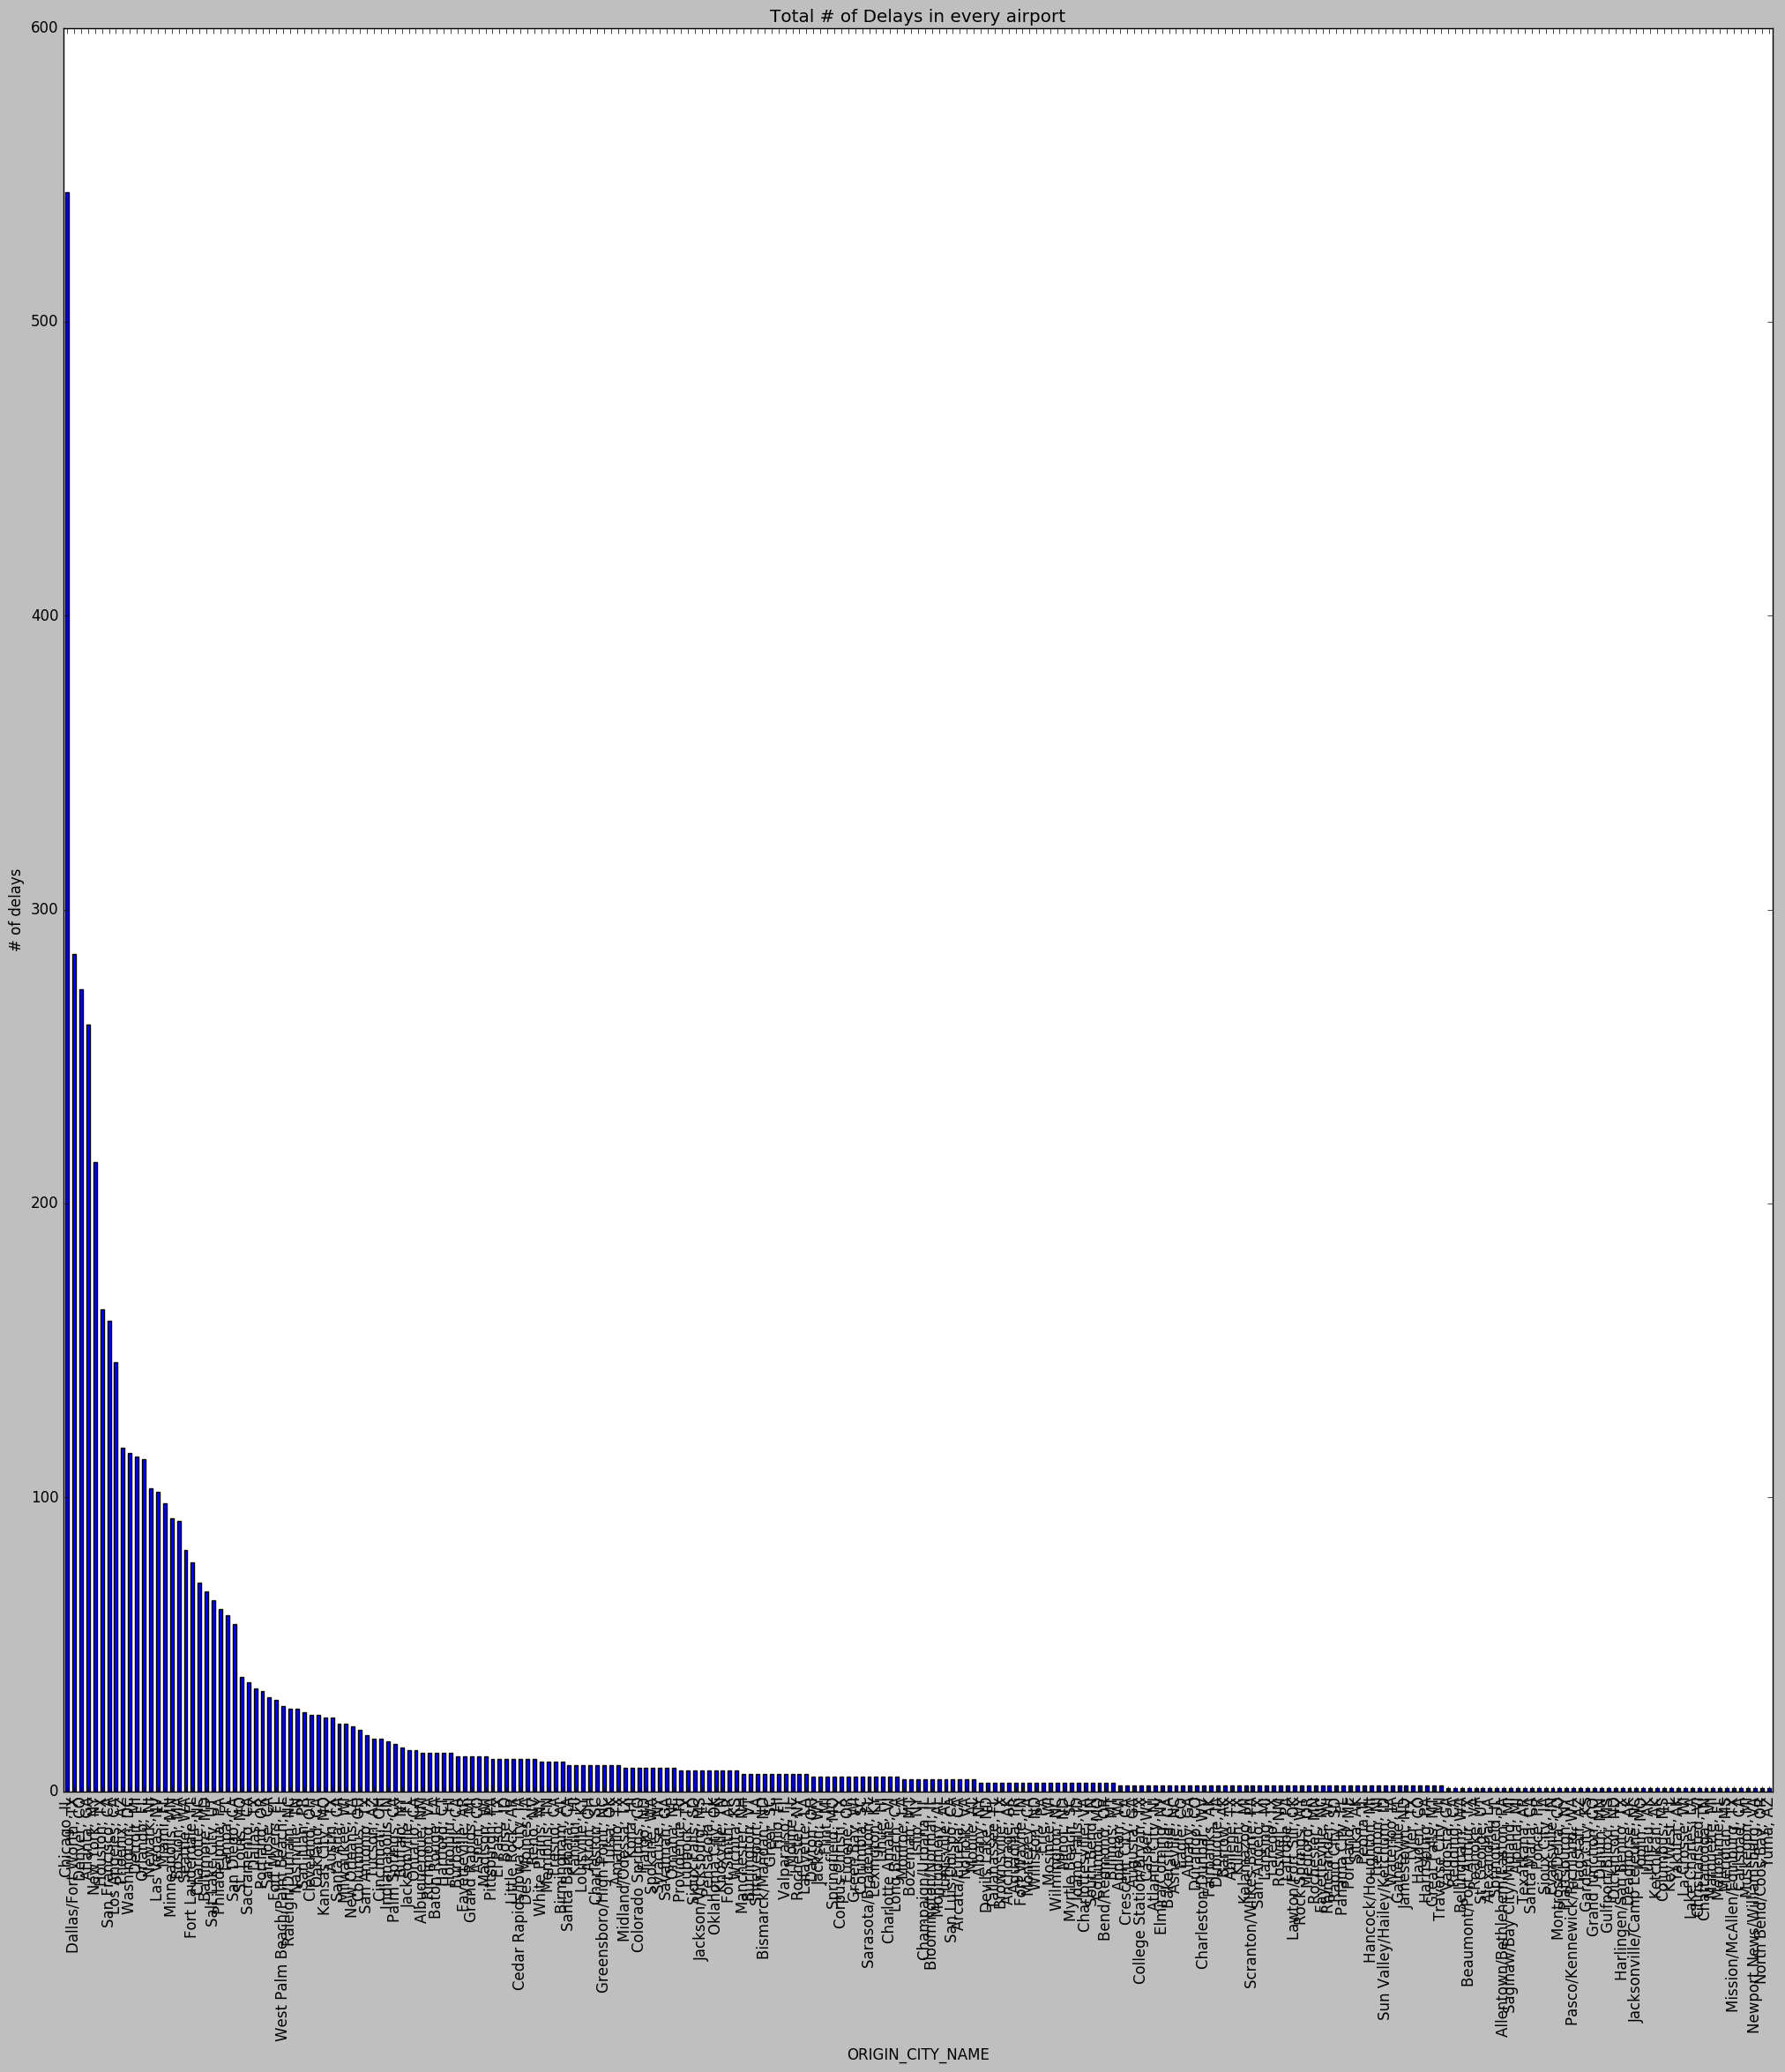

In [17]:
plt.style.use('classic')
filtered.groupby('ORIGIN_CITY_NAME').size().sort_values(ascending=False).plot(kind='bar',figsize=(25,25),
                                                                        title='Total # of Delays in every airport')
plt.grid(False)
plt.ylabel('# of delays')
plt.show()

In [18]:
#A peak at how many delays are there in which airport and city.
boom = filtered.groupby('ORIGIN_CITY_NAME').size()
boom.sort_values(ascending=True)

ORIGIN_CITY_NAME
Yuma, AZ                           1
North Bend/Coos Bay, OR            1
Newport News/Williamsburg, VA      1
Muskegon, MI                       1
Carlsbad, CA                       1
Mission/McAllen/Edinburg, TX       1
Meridian, MS                       1
Melbourne, FL                      1
Marquette, MI                      1
Chattanooga, TN                    1
Christiansted, VI                  1
Lake Charles, LA                   1
La Crosse, WI                      1
Yakutat, AK                        1
Key West, FL                       1
Columbus, MS                       1
Ketchikan, AK                      1
Juneau, AK                         1
Joplin, MO                         1
Jacksonville/Camp Lejeune, NC      1
Deadhorse, AK                      1
Harlingen/San Benito, TX           1
Dickinson, ND                      1
Gulfport/Biloxi, MS                1
Duluth, MN                         1
Grand Junction, CO                 1
Garden City, KS      

In [19]:
#Attempting to get the 95 percentile of the airports.
boom.quantile(.95)

102.79999999999998

Since the 95th percentile is 102.79, we can round it to 103. Since the question asked to find the delays in cities that exceed the 95th percentile, we ultimately want the airports that exceed 103 delays.

In [20]:
#Now we get the cities that have exceeded the number of delays >= 103
exceeded = boom.loc[boom >= 103]
exceeded

ORIGIN_CITY_NAME
Atlanta, GA              261
Chicago, IL              544
Dallas/Fort Worth, TX    285
Denver, CO               273
Detroit, MI              114
Houston, TX              164
Los Angeles, CA          146
New York, NY             214
Newark, NJ               103
Orlando, FL              113
Phoenix, AZ              117
San Francisco, CA        160
Washington, DC           115
dtype: int64

# Q1 + 2 + 3
### We will find out the airlines that caused the most delays in the 13 airports ,cities we found above and plot it as a pie chart. Then we will compute the % that those airlines most at fault contribute to the total number of delays.

<span style="color:red;font-size:18pt">Atlanta, GA</span>

In [21]:
filtered[filtered['ORIGIN_CITY_NAME'].str.contains('Atlanta, GA')].groupby('UNIQUE_CARRIER').size()
#can we do multiple str.contains?

UNIQUE_CARRIER
AA      4
DL    111
EV     83
F9      2
MQ      4
NK      4
OO      6
UA      2
US      3
WN     42
dtype: int64

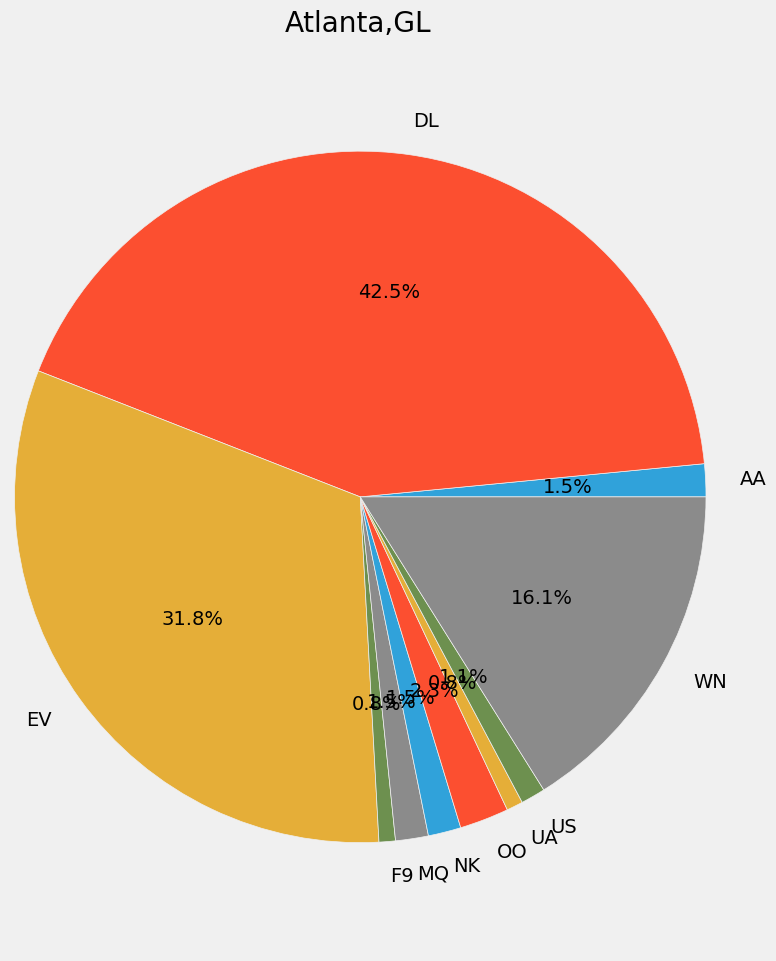

In [22]:
plt.style.use('fivethirtyeight')
filtered[filtered['ORIGIN_CITY_NAME'].str.contains('Atlanta, GA')].groupby('UNIQUE_CARRIER').size().plot(kind='pie',
                                                                title='Atlanta,GL',figsize=(8,11),autopct='%1.1f%%')
plt.axis("equal")
plt.axes().set_ylabel('')
plt.show()

<span style="color:blue">From the result above, we see that DL(Delta Airlines) causes the most delay in Atlanta,GA during the period of January,2015</span>

<span style="color:red;font-size:18pt">Chicago, IL</span>

In [23]:
filtered[filtered['ORIGIN_CITY_NAME'].str.contains('Chicago, IL')].groupby('UNIQUE_CARRIER').size()

UNIQUE_CARRIER
AA     54
B6      2
DL      7
EV     61
F9      9
MQ    134
NK     17
OO     70
UA     94
US     10
VX      1
WN     85
dtype: int64

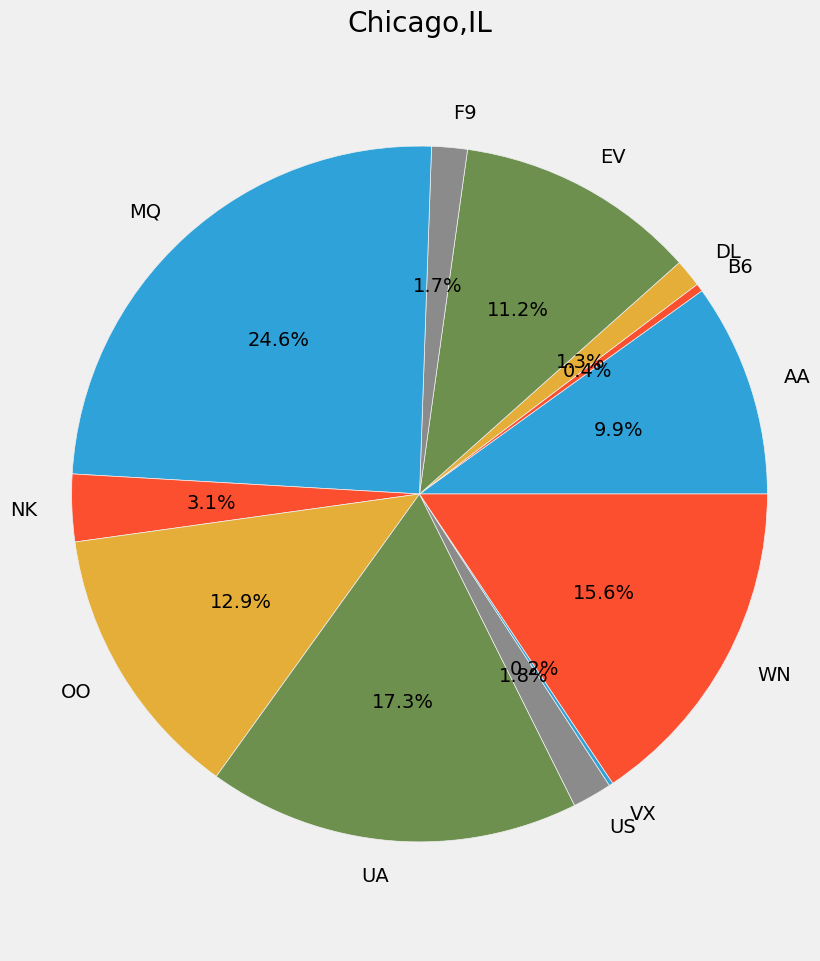

In [24]:
filtered[filtered['ORIGIN_CITY_NAME'].str.contains('Chicago, IL')].groupby('UNIQUE_CARRIER').size().plot(kind='pie',
                                                                title='Chicago,IL',figsize=(8,11),autopct='%1.1f%%',)
plt.axis("equal")
plt.axes().set_ylabel('')
plt.show()

<span style="color:blue">From the result above, we see that MQ(American Eagle Airlines) causes the most delay in Chicago,IL during the period of January,2015</span>

<span style="color:red; font-size:18pt">Dallas/Fort Worth, TX</span>

In [25]:
filtered[filtered['ORIGIN_CITY_NAME'].str.contains('Dallas/Fort Worth, TX')].groupby('UNIQUE_CARRIER').size()

UNIQUE_CARRIER
AA    147
B6      2
DL      4
EV     20
F9      1
MQ     91
NK      9
OO      5
UA      1
US      5
dtype: int64

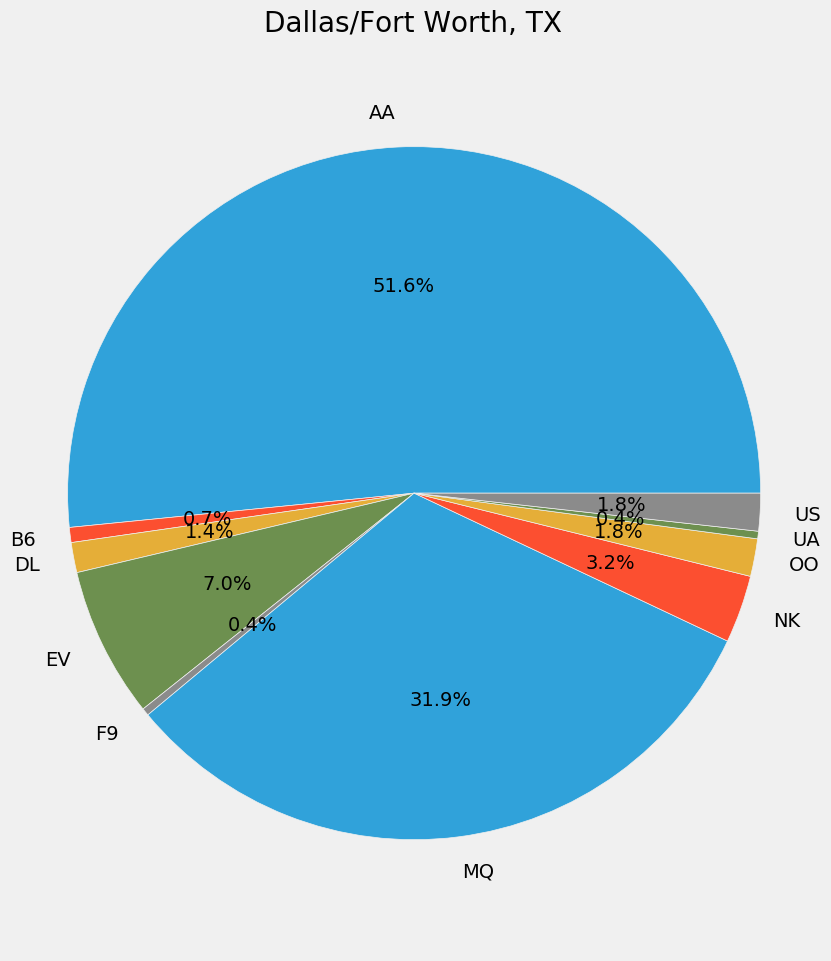

In [26]:
filtered[filtered['ORIGIN_CITY_NAME'].str.contains('Dallas/Fort Worth, TX')].groupby('UNIQUE_CARRIER').size().plot(
    kind='pie',title='Dallas/Fort Worth, TX',figsize=(8,11),autopct='%1.1f%%')
plt.axis("equal")
plt.axes().set_ylabel('')
plt.show()

<span style="color:blue">From the result above, we see that AA(American Airlines) causes the most delay in Dallas/Fort Worth, TX during the period of January,2015</span>

<span style="color:red; font-size:18pt">Denver, CO</span>

In [27]:
filtered[filtered['ORIGIN_CITY_NAME'].str.contains('Denver, CO')].groupby('UNIQUE_CARRIER').size()

UNIQUE_CARRIER
AA     6
DL     4
EV    20
F9    22
NK     5
OO    93
UA    50
US     3
WN    70
dtype: int64

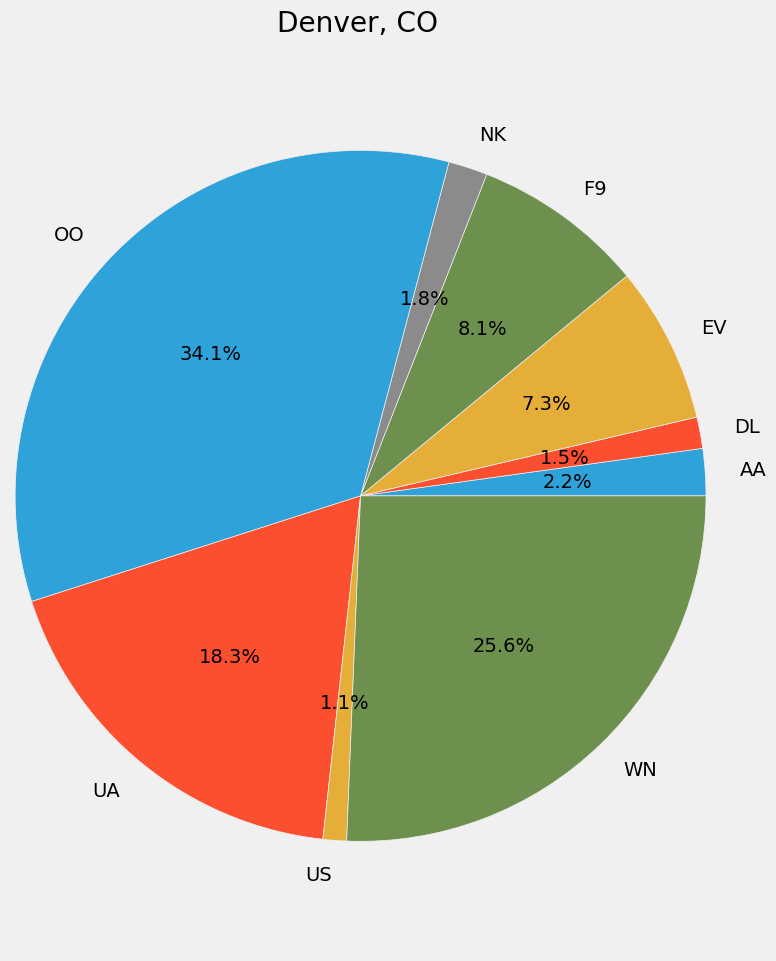

In [28]:
filtered[filtered['ORIGIN_CITY_NAME'].str.contains('Denver, CO')].groupby('UNIQUE_CARRIER').size().plot(kind='pie',
                                                                title='Denver, CO',figsize=(8,11),autopct='%1.1f%%')
plt.axis("equal")
plt.axes().set_ylabel('')
plt.show()

<span style="color:blue">From the result above, we see that OO(SkyWest Airlines) causes the most delays in Denver,CO during the period of January,2015</span>

<span style="color:red; font-size:18pt">Detroit, MI</span>

In [29]:
filtered[filtered['ORIGIN_CITY_NAME'].str.contains('Detroit, MI')].groupby('UNIQUE_CARRIER').size()

UNIQUE_CARRIER
B6     1
DL    35
EV    36
MQ     9
NK    15
OO     9
US     2
WN     7
dtype: int64

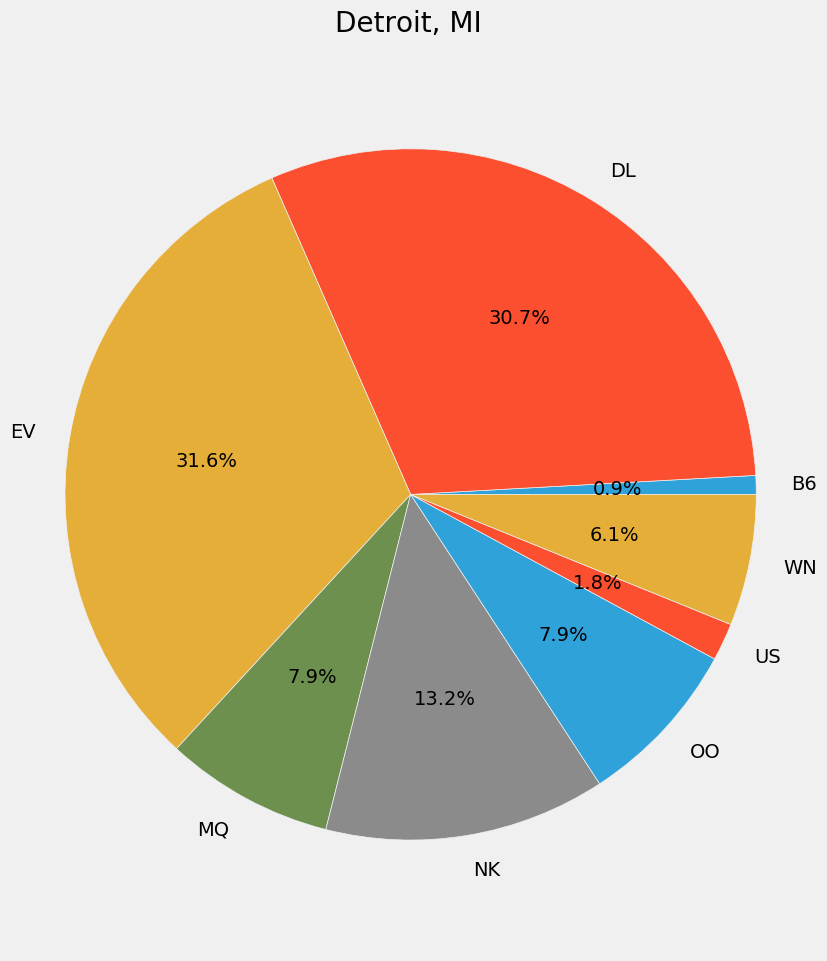

In [30]:
filtered[filtered['ORIGIN_CITY_NAME'].str.contains('Detroit, MI')].groupby('UNIQUE_CARRIER').size().plot(kind='pie',
                                                                title='Detroit, MI',figsize=(8,11),autopct='%1.1f%%')
plt.axis("equal")
plt.axes().set_ylabel('')
plt.show()

<span style="color:blue">From the result above, we see that EV(ExpressJet Airlines) causes the most delay in Detroit, MI during the period of January,2015</span>

<span style="color:red; font-size:18pt">Houston, TX</span>

In [31]:
filtered[filtered['ORIGIN_CITY_NAME'].str.contains('Houston, TX')].groupby('UNIQUE_CARRIER').size()

UNIQUE_CARRIER
AA     2
DL     1
EV    44
F9     1
MQ     3
NK     6
OO    26
UA    46
US     6
WN    29
dtype: int64

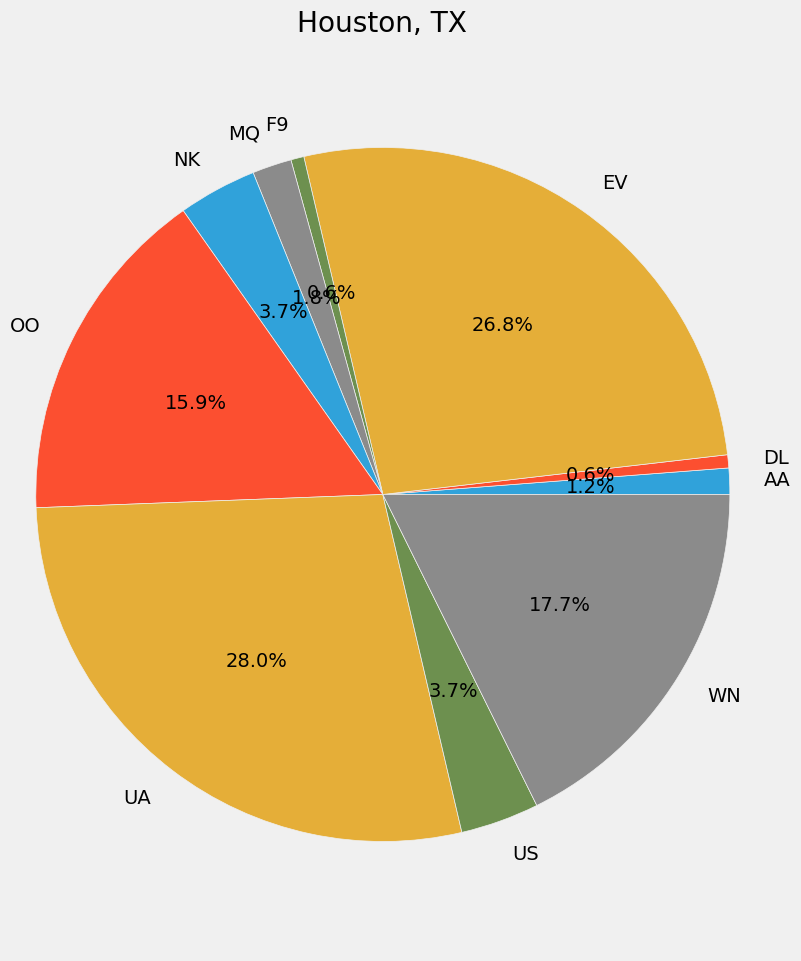

In [32]:
filtered[filtered['ORIGIN_CITY_NAME'].str.contains('Houston, TX')].groupby('UNIQUE_CARRIER').size().plot(kind='pie',
                                                                title='Houston, TX',figsize=(8,11),autopct='%1.1f%%')
plt.axis("equal")
plt.axes().set_ylabel('')
plt.show()

<span style="color:blue">From the result above, we see that UA(United Airlines) causes the most delay in Houston, TX during the period of January,2015</span>

<span style="color:red; font-size:18pt">Los Angeles, CA</span>

In [33]:
filtered[filtered['ORIGIN_CITY_NAME'].str.contains('Los Angeles, CA')].groupby('UNIQUE_CARRIER').size()

UNIQUE_CARRIER
AA    17
AS     1
B6     2
DL     7
NK     3
OO    41
UA    27
US     2
VX    10
WN    36
dtype: int64

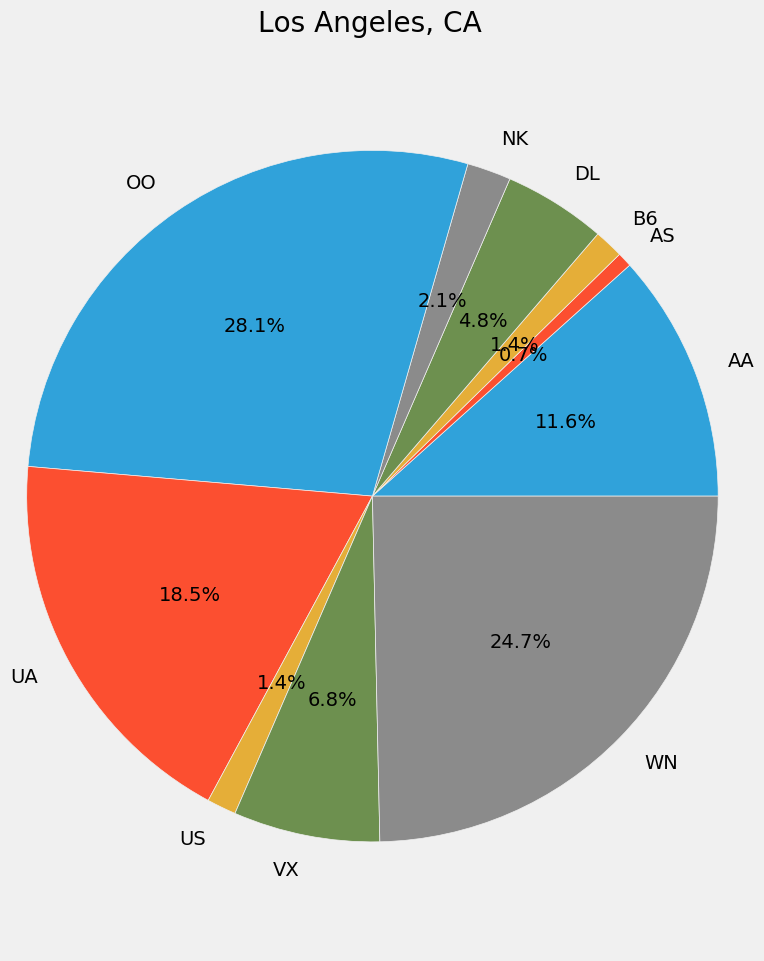

In [34]:
filtered[filtered['ORIGIN_CITY_NAME'].str.contains('Los Angeles, CA')].groupby('UNIQUE_CARRIER').size().plot(kind='pie',
                                                                title='Los Angeles, CA',figsize=(8,11),autopct='%1.1f%%')
plt.axis("equal")
plt.axes().set_ylabel('')
plt.show()

<span style="color:blue">From the result above, we see that OO(SkyWest Airlines) causes the most delay in Houston, TX during the period of January,2015</span>

<span style="color:red; font-size:18pt">New York, NY</span>

In [35]:
filtered[filtered['ORIGIN_CITY_NAME'].str.contains('New York, NY')].groupby('UNIQUE_CARRIER').size()

UNIQUE_CARRIER
AA    20
B6    39
DL    44
EV    20
MQ    37
NK     6
UA    18
US    17
VX     1
WN    12
dtype: int64

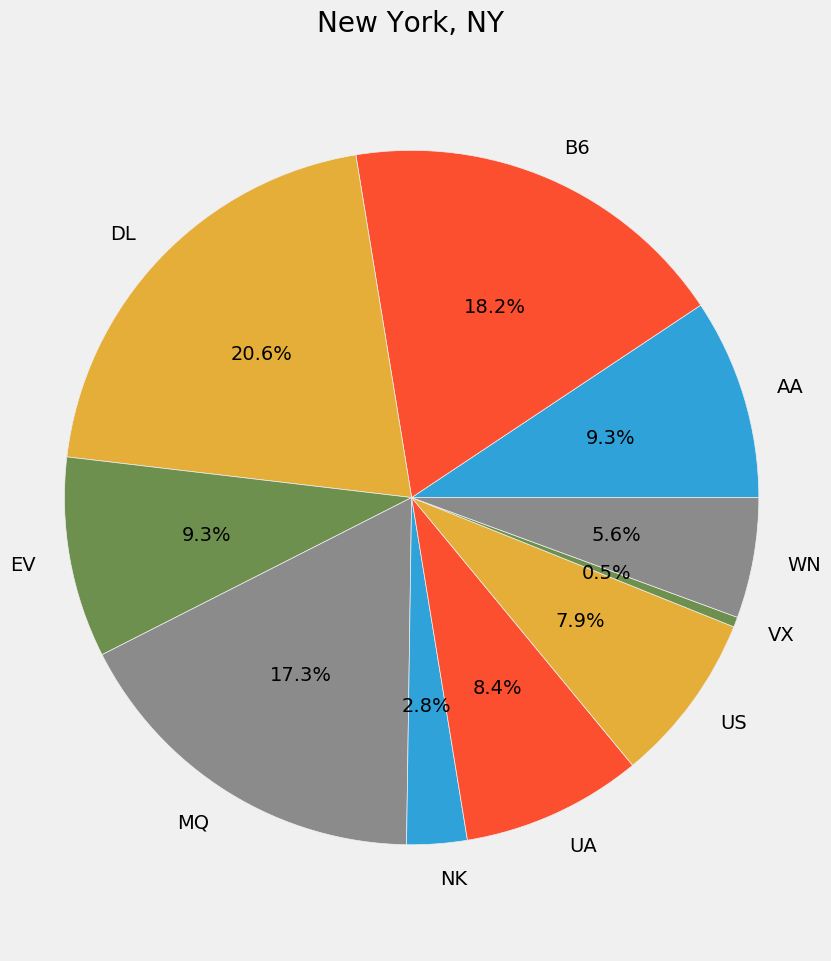

In [36]:
filtered[filtered['ORIGIN_CITY_NAME'].str.contains('New York, NY')].groupby('UNIQUE_CARRIER').size().plot(kind='pie',
                                                                title='New York, NY',figsize=(8,11),autopct='%1.1f%%')
plt.axis("equal")
plt.axes().set_ylabel('')
plt.show()

<span style="color:blue">From the result above, we see that DL(Delta Airlines) causes the most delay in New York, NY during the period of January,2015</span>

<span style="color:red; font-size:18pt">Newark, NJ</span>

In [37]:
filtered[filtered['ORIGIN_CITY_NAME'].str.contains('Newark, NJ')].groupby('UNIQUE_CARRIER').size()

UNIQUE_CARRIER
AA     1
B6     5
DL     3
EV    31
UA    55
US     3
WN     5
dtype: int64

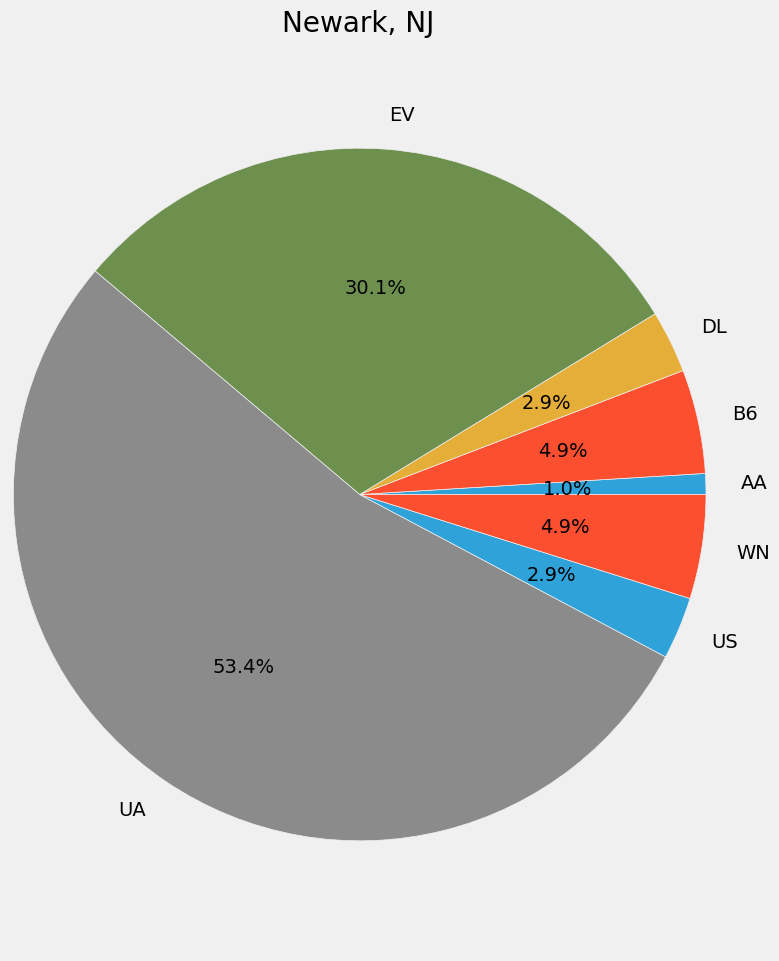

In [38]:
filtered[filtered['ORIGIN_CITY_NAME'].str.contains('Newark, NJ')].groupby('UNIQUE_CARRIER').size().plot(kind='pie',
                                                                title='Newark, NJ',figsize=(8,11),autopct='%1.1f%%')
plt.axis("equal")
plt.axes().set_ylabel('')
plt.show()

<span style="color:red; font-size:18pt">Orlando, FL</span>

<span style="color:blue">From the result above, we see that UA(United Airlines) causes the most delay in Newark, NJ during the period of January,2015</span>

In [39]:
filtered[filtered['ORIGIN_CITY_NAME'].str.contains('Orlando, FL')].groupby('UNIQUE_CARRIER').size()

UNIQUE_CARRIER
AA    14
B6    40
DL     9
F9     9
NK     6
UA    11
US     4
WN    20
dtype: int64

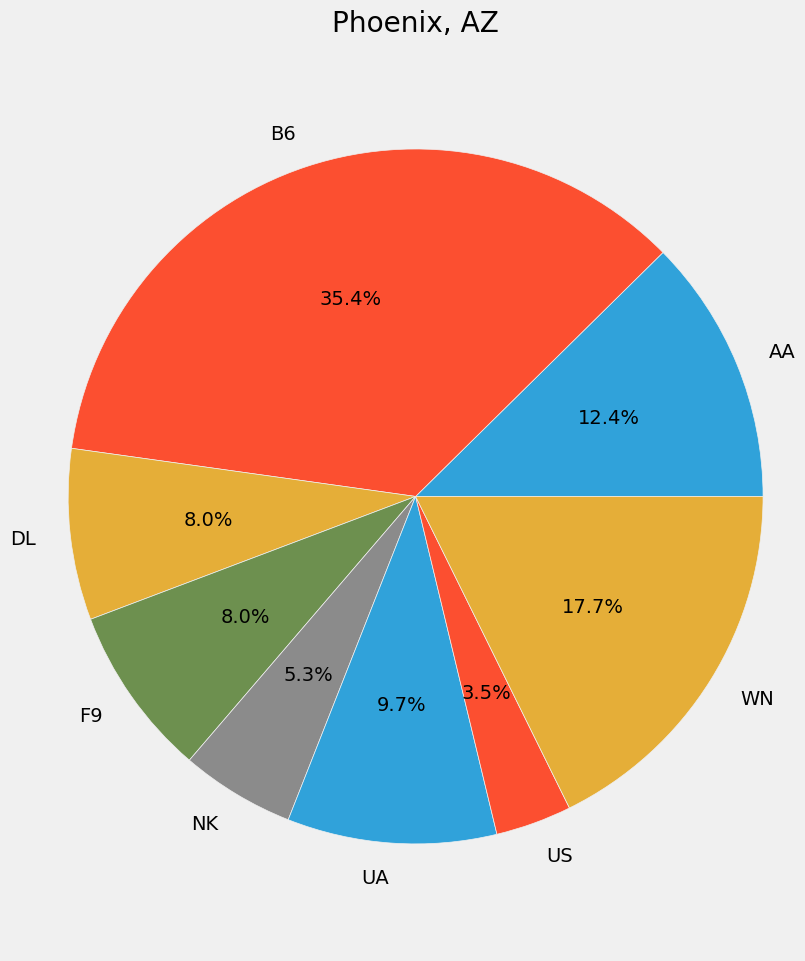

In [40]:
filtered[filtered['ORIGIN_CITY_NAME'].str.contains('Orlando, FL')].groupby('UNIQUE_CARRIER').size().plot(kind='pie',
                                                                title='Phoenix, AZ',figsize=(8,11),autopct='%1.1f%%')
plt.axis("equal")
plt.axes().set_ylabel('')
plt.show()

<span style="color:blue">From the result above, we see that B6(BlueJet) causes the most delay in Phoenix, AZ during the period of January,2015</span>

<span style="color:red; font-size:18pt">Phoenix, AZ</span>

In [41]:
filtered[filtered['ORIGIN_CITY_NAME'].str.contains('Phoenix, AZ')].groupby('UNIQUE_CARRIER').size()

UNIQUE_CARRIER
AA     8
DL     2
F9     3
NK     1
OO    13
UA     6
US    38
WN    46
dtype: int64

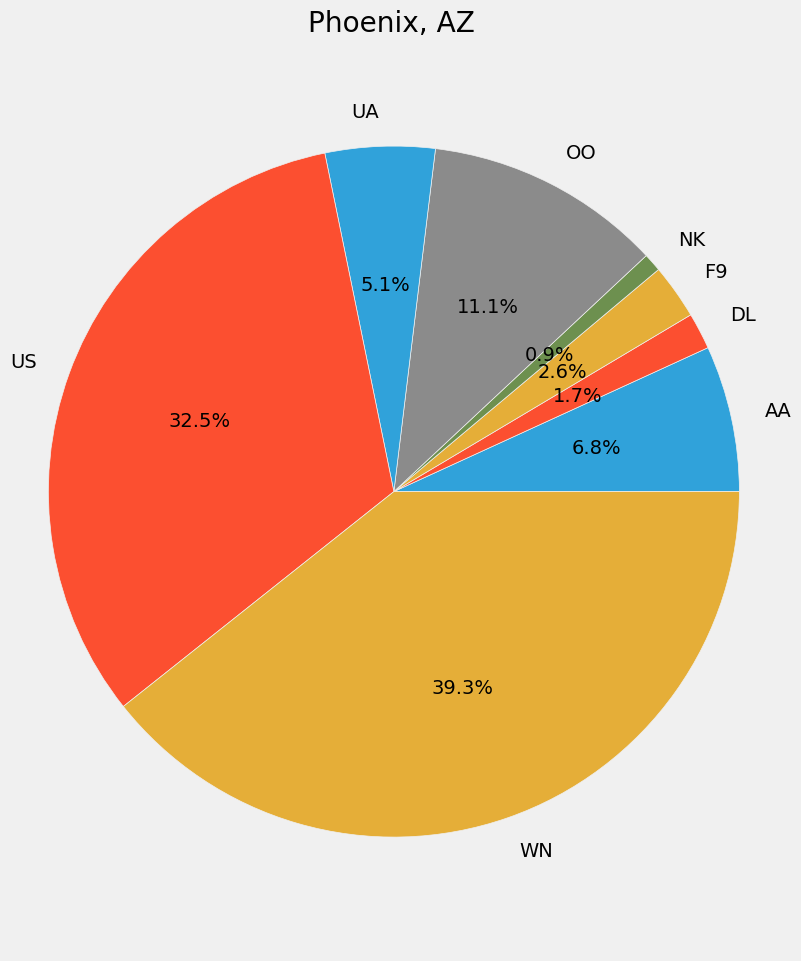

In [42]:
filtered[filtered['ORIGIN_CITY_NAME'].str.contains('Phoenix, AZ')].groupby('UNIQUE_CARRIER').size().plot(kind='pie',
                                                                title='Phoenix, AZ',figsize=(8,11),autopct='%1.1f%%')
plt.axis("equal")
plt.axes().set_ylabel('')
plt.show()

<span style="color:blue">From the result above, we see that WN(SouthWest Airlines) causes the most delay in Phoenix, AZ during the period of January,2015</span>

<span style="color:red; font-size:18pt">San Francisco, CA</span>

In [43]:
filtered[filtered['ORIGIN_CITY_NAME'].str.contains('San Francisco, CA')].groupby('UNIQUE_CARRIER').size()

UNIQUE_CARRIER
AA     6
AS     9
B6     3
DL     2
F9     1
OO    77
UA    38
VX     8
WN    16
dtype: int64

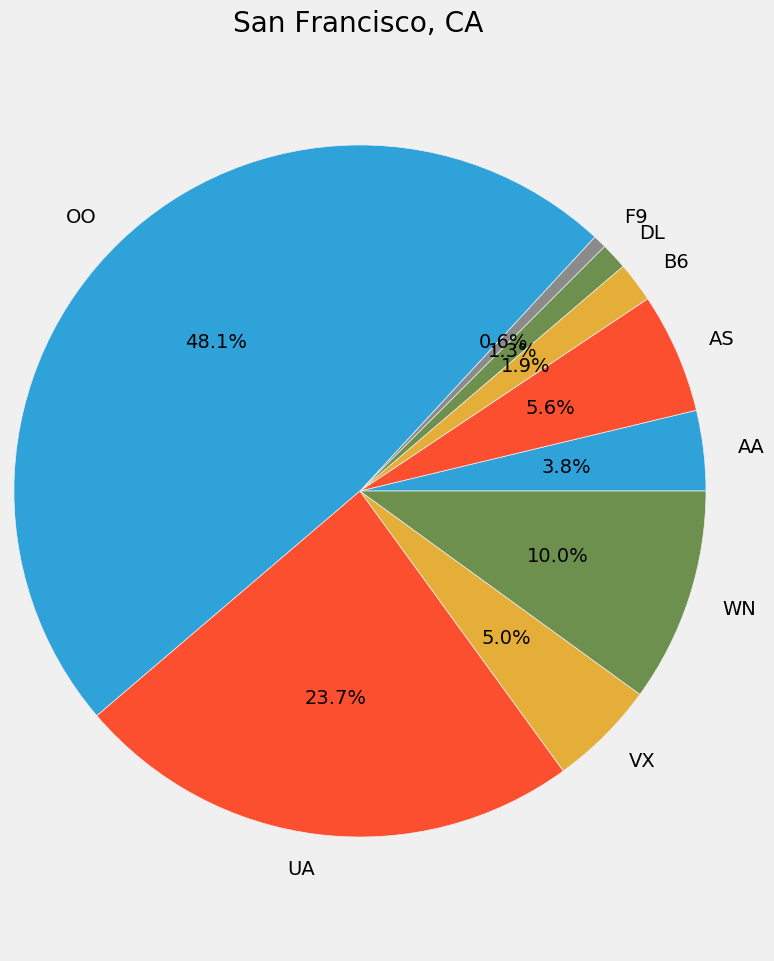

In [44]:
filtered[filtered['ORIGIN_CITY_NAME'].str.contains('San Francisco, CA')].groupby('UNIQUE_CARRIER').size().plot(kind='pie',
                                                                title='San Francisco, CA',figsize=(8,11),autopct='%1.1f%%')
plt.axis("equal")
plt.axes().set_ylabel('')
plt.show()

<span style="color:blue">From the result above, we see that UA(United Airlines) causes the most delay in San Francisco, CA during the period of January,2015</span>

<span style="color:red; font-size:18pt">Washington, DC</span>

In [45]:
filtered[filtered['ORIGIN_CITY_NAME'].str.contains('Washington, DC')].groupby('UNIQUE_CARRIER').size()

UNIQUE_CARRIER
AA     9
AS     1
B6    13
DL     7
EV    28
F9     4
MQ     4
OO     3
UA    18
US    12
VX     2
WN    14
dtype: int64

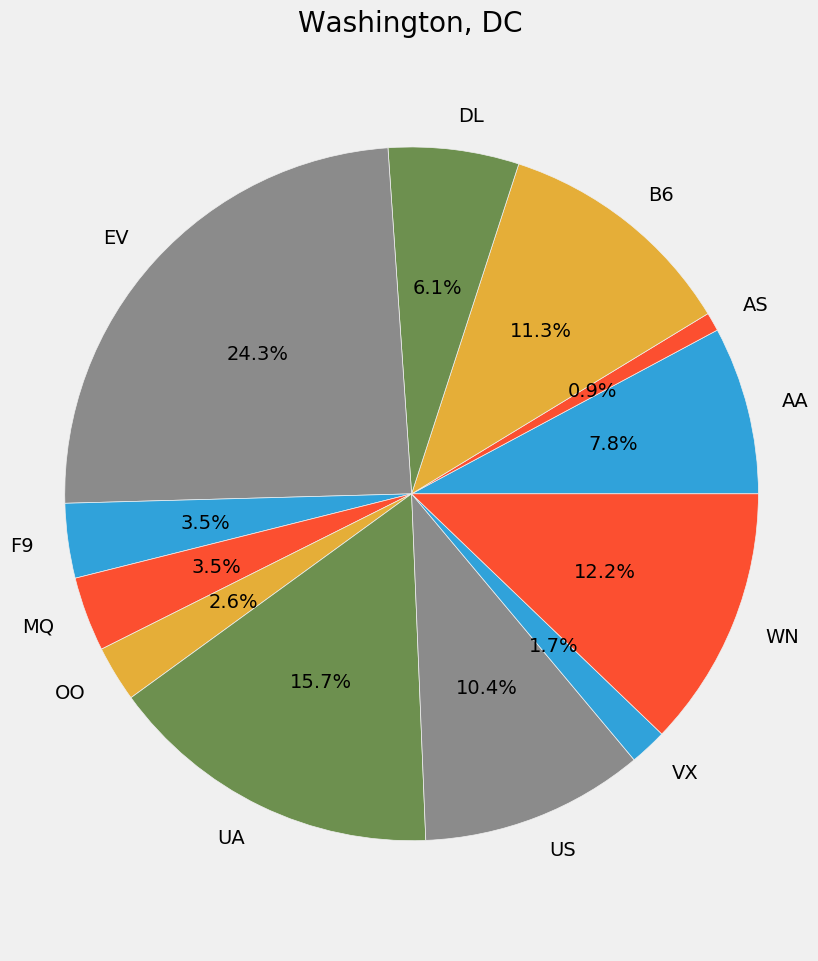

In [46]:
filtered[filtered['ORIGIN_CITY_NAME'].str.contains('Washington, DC')].groupby('UNIQUE_CARRIER').size().plot(kind='pie',
                                                                title='Washington, DC',figsize=(8,11),autopct='%1.1f%%')
plt.axis("equal")
plt.axes().set_ylabel('')
plt.show()

<span style="color:blue">From the result above, we see that EV(ExpressJet Airlines) causes the most delay in Washington, DC during the period of January,2015</span>

## Plot below shows the total # of delays by airlines across all the 13 airports we found above.

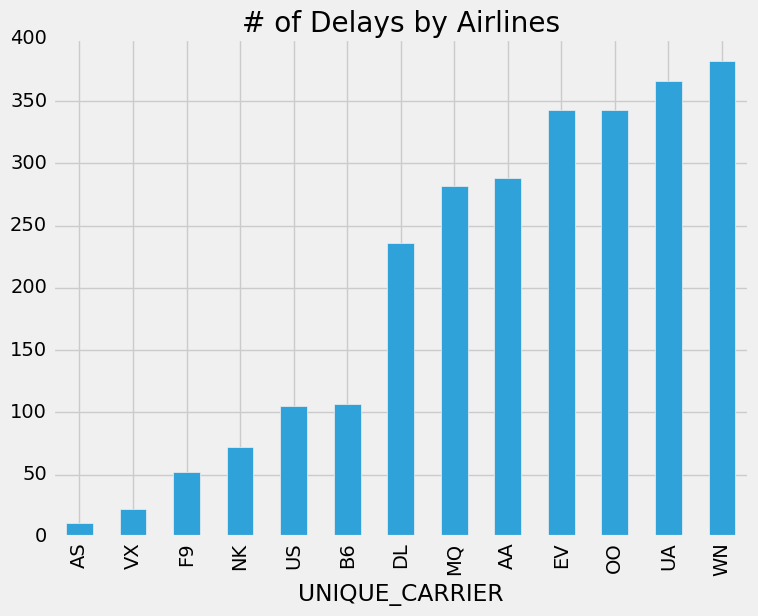

In [47]:
plt.style.use('fivethirtyeight')
S=filtered[filtered['ORIGIN_CITY_NAME'].str.contains('Atlanta, GA|Chicago, IL|Dallas/Fort Worth, TX|Denver, CO|Detroit, MI|Houston, TX|Los Angeles, CA|New York, NY|Newark, NJ|Orlando, FL|Phoenix, AZ|San Francisco, CA|Washington, DC')]
S.groupby('UNIQUE_CARRIER').size().sort_values(ascending=True).plot(kind='bar',title='# of Delays by Airlines');

# Prompt 2:

Two drones, A and B, that travel together are used to detect and locate people in distress in a large area of forest land. The detectability of drone A is 0.8 ( that is, the probability that a person in distress will be detected by drone A is 0.8), whereas the detectability of drone B is 0.9. However, when a person in distress has been detected their location may not be pinpointed accurately by either drone. Based on a detection from drone A alone, the location of the distressed individual can be accurately determined with probability 0.7, whereas the corresponding probability with drone B alone is only 0.4. If a person in distress is detected by both drones, their location can be pinpointed with certainty. Determine the the probability of accurately locating a distressed individual.

$P(A)=0.8 \text{ (Detectability of drone A)}\\ 
P(B)=0.9 \text{ (Detectability of drone B)}\\
P(A)'=0.2 \text{ (Probability person in distress NOT detected by drone A)}\\
P(B)'=0.1 \text{ (Probability person in distress NOT detected by drone B)}\\
P(L|A)=0.7 \text{ (Probability person in distress accurately located given that he/she is detected by drone A)}\\
P(L|B)=0.4 \text{ (Probability person in distress accurately located given that he/she is detected by drone B)}\\
P(A \cap B)=0.8 \cdot 0.9 \text{ (Probabilily person in distress detected by drone A and B)}\\
P(A \cap B)'=0.2 \cdot 0.1 \text{ (Probabilily person in distress NOT detected by drone A and B)}\\
P(L|A\cap B)= 1 \text{ (Probability person in distressed accurately located given that he/she detected by drone A and B)}\\
P(L|(A\cap B)')= 0 \text{ (Probability person in distressed accurately located given that he/she is NOT detected by drone A and B)}\\
$

$$[P(A) \cdot P(L|A) \cdot P(B)'] + 
[P(B) \cdot P(L|B) \cdot P(A)'] + 
[P(A\cap B) \cdot P(L|(A \cap B)] +
[P(A\cap B)' \cdot P(L|(A \cap B'))]
$$

$$(0.8 \cdot 0.7 \cdot 0.1) + (0.9 \cdot 0.4 \cdot 0.2) + (0.8 \cdot 0.9 \cdot 1) + (0.2 \cdot 0.1 \cdot 0) = 0.848
\equiv 84.8\%$$